# **VQA (Visual Question Answering) 시각적 질의응답**

시각적인 이미지와 그 이미지에 대한 질문을 입력 + 질문에 적절한 답을 출력

https://velog.io/@stophyunn/VQA-Visual-Question-Answering

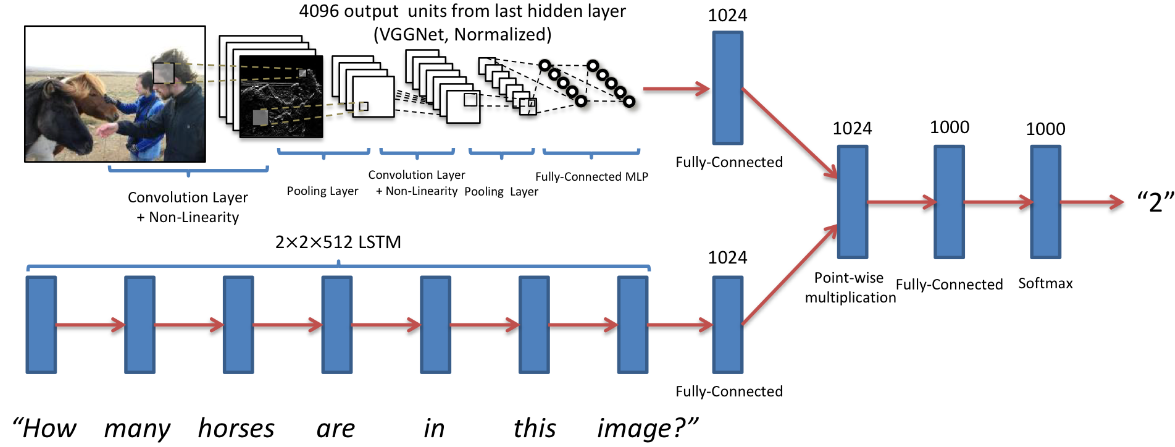

### **1. 합성 이미지 및 데이터 생성**

In [ ]:
from PIL import Image
import random

In [ ]:
# Define a function that generates data
def generate_data(num_samples):
    colors = {
        'red': (255, 0, 0),
        'green': (0, 255, 0),
        'blue': (0, 0, 255),
        'yellow': (255, 255, 0),
        'magenta': (255, 0, 255),
        'cyan': (0, 255, 255)
    }
    questions = []
    answers = []
    images = []

    # Generate data
    for _ in range(num_samples):
        # Randomly select color
        color_name, rgb = random.choice(list(colors.items()))

        # Generate image
        image = Image.new('RGB', (224, 224), color=rgb)
        images.append(image)

        # Generate question
        question = 'What is the color of the image?'
        questions.append(question)

        # Generate answer
        answer = color_name
        answers.append(answer)

    return images, questions, answers

In [ ]:
# Create synthetic data for train
num_samples = 100
images, questions, answers = generate_data(num_samples)

In [ ]:
# Create synthetic data for test
num_test_samples = 20
test_images, test_questions, test_answers = generate_data(num_test_samples)

### **2. 모델 입력을 위한 데이터 전처리**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
# Transform images into numpy array
image_data = np.array([np.array(img) for img in images])

# Tokenize questions
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions)
question_sequences = tokenizer.texts_to_sequences(questions)
question_data = pad_sequences(question_sequences, maxlen=10)

# Encode answers
label_encoder = LabelEncoder()
answer_labels = label_encoder.fit_transform(answers)
answer_data = to_categorical(answer_labels)

In [ ]:
print("Images shape:", image_data.shape)
print("Questions shape:", question_data.shape)
print("Answers shape:", answer_data.shape)

Images shape: (100, 224, 224, 3)
Questions shape: (100, 10)
Answers shape: (100, 6)


In [ ]:
# Transform test images into numpy array
test_image_data = np.array([np.array(img) for img in test_images])

# Tokenize test questions
test_question_sequences = tokenizer.texts_to_sequences(test_questions)
test_question_data = pad_sequences(test_question_sequences, maxlen=10)

# Encode test answers
test_answer_labels = label_encoder.transform(test_answers)
test_answer_data = to_categorical(test_answer_labels)

In [ ]:
print("Test images shape:", test_image_data.shape)
print("Test questions shape:", test_question_data.shape)
print("Test answers shape:", test_answer_data.shape)

Test images shape: (20, 224, 224, 3)
Test questions shape: (20, 10)
Test answers shape: (20, 6)


### **3. 모델 설계 및 학습**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Embedding, LSTM, concatenate

In [ ]:
# Define model
def build_model(vocal_size, num_answers):
    # CNN for image
    image_input = Input(shape=(224, 224, 3))
    x = Conv2D(16, (3, 3), activation='relu')(image_input)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    image_model = Dense(128, activation='relu')(x)

    # LSTM for text
    text_input = Input(shape=(10,))
    y = Embedding(input_dim=vocab_size, output_dim=64, input_length=10)(text_input)
    y = LSTM(64)(y)
    text_model = Dense(128, activation='relu')(y)

    # Combine CNN and LSTM
    combined = concatenate([image_model, text_model])
    output = Dense(num_answers, activation='softmax')(combined)
    model = Model(inputs=[image_input, text_input], outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Build model
vocab_size = len(tokenizer.word_index) + 1
num_answers = answer_data.shape[1]
model = build_model(vocab_size, num_answers)

In [ ]:
# Fit the model
model.fit([image_data, question_data], answer_data, epochs=10, batch_size=32)

Epoch 1/10
4/4 [==============================] - 8s 892ms/step - loss: 4062.0793 - accuracy: 0.4700
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 4260.6792 - accuracy: 0.5200
Epoch 3/10
4/4 [==============================] - 5s 1s/step - loss: 277.4518 - accuracy: 0.7100
Epoch 4/10
4/4 [==============================] - 4s 950ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 5s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 4s 863ms/step - loss: 7.4914 - accuracy: 0.9200
Epoch 7/10
4/4 [==============================] - 3s 833ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
4/4 [==============================] - 4s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 4s 866ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 4s 864ms/step - loss: 0.0000e+00 - accuracy: 1.0000

### **4. 모델 평가**

In [ ]:
loss, accuracy = model.evaluate([test_image_data, test_question_data], test_answer_data)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Test loss: 0.0000
Test accuracy: 1.0000


### **5. 예측**

1/1 [==============================] - 0s 378ms/step


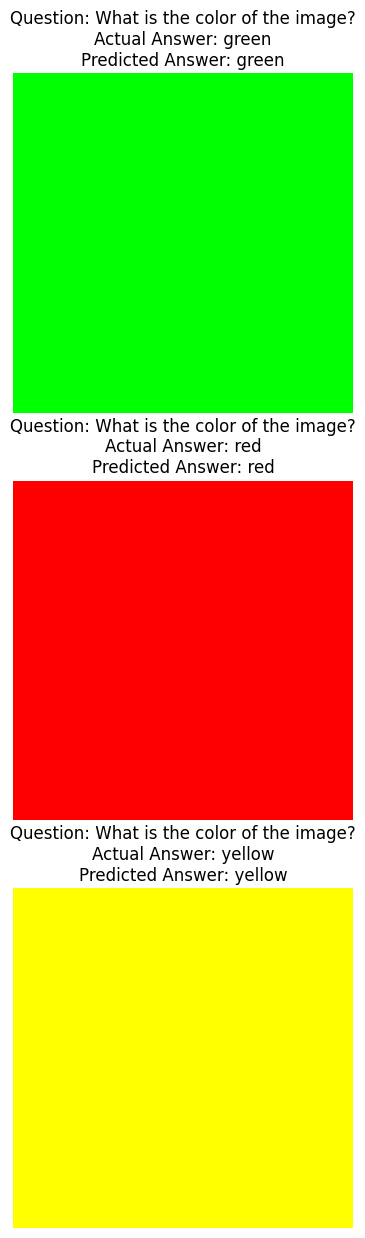

In [ ]:
import matplotlib.pyplot as plt

# Predict the answer
predictions = model.predict([test_image_data, test_question_data])
predicted_answers = np.argmax(predictions, axis=1)

# Inverse transform to original answer
predicted_answer_labels = label_encoder.inverse_transform(predicted_answers)

# Show result
num_display = 3
fig, axes = plt.subplots(num_display, 1, figsize=(5, 5 * num_display))
for i in range(num_display):
    ax = axes[i]
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f'Question: {test_questions[i]}\n'
                 f'Actual Answer: {test_answers[i]}\n'
                 f'Predicted Answer: {predicted_answer_labels[i]}')
plt.show()